In [17]:
import scipy.optimize
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def Differential_Evolution(bounds, filename):
    
    df = pandas.read_csv(filename)
    ydata = df.T1.values
    udata = df.Q1.values
    time = df.Time.values
    
    ydev = ydata - ydata[0] # Deviation variables
    udev = udata - udata[0]
    
    def OF_ARX(x):
        a1, a2, b1, b2 = x
        yt = []
        for i, it in enumerate(time):
            if i-1<0:
                y1 = ydev[0]
                u1 = udev[0]
            else:
                y1 = ydev[i-1]
                u1 = udev[i-1]
            if i-2<0:
                y2 = ydev[0]
                u2 = udev[0]
            else:
                y2 = ydev[i-2]
                u2 = udev[i-2]
            if i-3<0:
                y3 = ydev[0]
                u3 = udev[0]
            else:
                y3 = ydev[i-3]
                u3 = udev[i-3]
            yt.append(a1*y1 + a2*y2 + b1*u1 + b2*u2 )#+ a3*y3 + b3*u3)

        return sum((ydata - (yt+ydata[0]))**2)
    
    a1, a2, b1, b2 = scipy.optimize.differential_evolution(OF_ARX, bounds).x
   
    y_difev = []
    y_0 = y_1 = y_2 = ydev[0]
    
    for i, ti in enumerate(time):
        u_1 = 0 if i < 1 else udev[i-1]
        u_2 = 0 if i < 2 else udev[i-2]
        y_2, y_1 = y_1, y_0
        y_0 = a1*y_1 + a2*y_2 + b1*u_1 + b2*u_2
        y_difev.append(y_0)

    y_difev = np.array(y_difev + ydata[0])
    
    plt.plot(time, ydata, label = "Data")
    plt.plot(time, y_difev, label = "Prediction")
    plt.xlabel("Time")
    plt.ylabel("Output")
    plt.title(filename)
    plt.legend(loc='best')

        

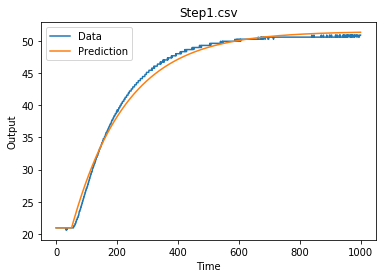

In [39]:
bnds = ((-1,1),(-1,1),(-1,1),(-1,1))
Differential_Evolution(bnds, 'Step1.csv')

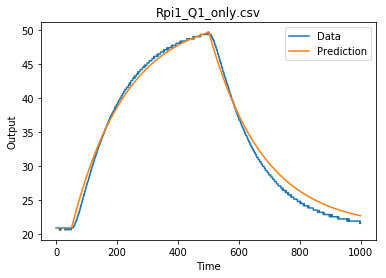

In [40]:
bnds = ((-1,1),(-1,1),(-1,1),(-1,1))
Differential_Evolution(bnds, 'Rpi1_Q1_only.csv')

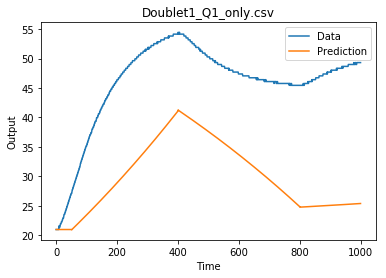

In [41]:
bnds = ((-5,5),(-5,5),(-5,5),(-5,5))
Differential_Evolution(bnds, 'Doublet1_Q1_only.csv')